In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [9]:
data=pd.read_csv('general_dataa.csv')
data.isna().sum()
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
label_enconder=LabelEncoder()
data['Gender']=label_enconder.fit_transform(data['Gender'])

In [11]:
features=pd.DataFrame([data['Age'], data['Gender'], data['MonthlyIncome'], data['YearsAtCompany'], data['YearsSinceLastPromotion']]).T

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree1=DecisionTreeClassifier()
tree1.fit(X=features, y=data['Attrition'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
from sklearn import tree
with open('tree.dot', 'w') as f:
  f=tree.export_graphviz(tree1, feature_names=['Age', 'Gender', 'MonthlyIncome','YearsAtCompany', 'YearsSinceLastPromotion'], out_file=f);

[Text(137.3239103335626, 213.0912, 'X[3] <= 1.5\ngini = 0.27\nsamples = 4410\nvalue = [3699, 711]'),
 Text(46.455226960110046, 204.3936, 'X[0] <= 33.5\ngini = 0.454\nsamples = 645\nvalue = [420, 225]'),
 Text(30.12585969738652, 195.696, 'X[2] <= 112610.0\ngini = 0.497\nsamples = 306\nvalue = [141, 165]'),
 Text(16.041540577716646, 186.9984, 'X[0] <= 22.5\ngini = 0.486\nsamples = 267\nvalue = [111, 156]'),
 Text(3.684181568088033, 178.3008, 'X[2] <= 23140.0\ngini = 0.33\nsamples = 72\nvalue = [15, 57]'),
 Text(2.456121045392022, 169.60320000000002, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(4.912242090784044, 169.60320000000002, 'X[0] <= 18.5\ngini = 0.287\nsamples = 69\nvalue = [12, 57]'),
 Text(2.456121045392022, 160.9056, 'X[2] <= 25995.0\ngini = 0.49\nsamples = 21\nvalue = [9, 12]'),
 Text(1.228060522696011, 152.208, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(3.684181568088033, 152.208, 'X[2] <= 33490.0\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(2.456121045392

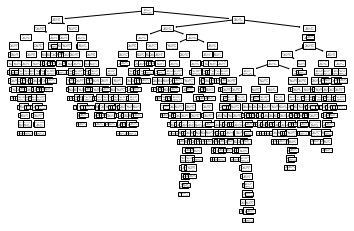

In [15]:
tree.plot_tree(tree1)

In [16]:
features=pd.DataFrame([data['Age'], data['Gender'], data['MonthlyIncome'], data['YearsAtCompany'], data['YearsSinceLastPromotion']]).T

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=1000, oob_score=True)
model_rf.fit(X=features, y=data["Attrition"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
print("The oob score", model_rf.oob_score_)

The oob score 1.0


In [20]:
for feature,imp in zip(features, model_rf.feature_importances_):
  print(feature,imp)

Age 0.26818789293823325
Gender 0.04174478415512359
MonthlyIncome 0.45018113393221637
YearsAtCompany 0.1619232255690921
YearsSinceLastPromotion 0.07796296340533464
